# Progetto Python Start2Impact

[Il dataset scelto](https://www.kaggle.com/datasets/lava18/google-play-store-apps)

___
# Data Import

1. Sono state importate le librerie utilizzate per svolgere il progetto 
2. Tramite Pandas è stato letto il file scaricato da ***Kaggle***
3. Infine i metodi **``` .info() e .head() ```** permettono di visualizzare come è fatto il DataFrame, reperendo informazioni su righe, colonne, tipologie degli elementi, se ci sono o no elementi nulli (ad esempio nella colonna *Rating* notiamo che gli elementi sono di tipo *float* e che quelli non nulli sono 9367 rispetto alle 10841 righe che costituiscono il DataFrame).

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid')

In [2]:
df = pd.read_csv('googleplaystore.csv')

In [3]:
df.info()       

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [4]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


___
# Data Cleaning

### ***Spiegazione della fase di data cleaning (se la si vuole leggere)*** 

Questo è il mio database di partenza **```df = pd.read_csv('googleplaystore.csv')```**

Voglio svolgere un'attività di ***data cleaning:***

> Ci sono delle colonne che non mi servirano nell'analisi quindi salvo il dataframe andando ad eliminarle **```df=df[['App','Rating','Reviews','Installs','Price','Type','Category']]```**

> **```df[df['App'].isnull()] -->```** controllo per ogni colonna i valori nulli, in particolare noto che Rating ha alcune colonne nulle, ma non sono interessato a cambiarle. Potrei rimpiazzare i valori nulli con il valor medio della colonna **```df['Rating'].fillna(value=round(df['Rating'].mean(), 1), inplace=True)```**, ma in realta non creano problemi durante l'analisi. Piu che altro noto che guardando i valori nulli della colonna 'Type' trovo che è presente un solo valore nullo alla riga 9148, ed è relativo ad un'App che ha solo la categoria ma nessuna informazione. Potrei eliminarla con il comando **```df.drop(index=9148, inplace=True)```**, ma decido di rimpiazzare il valore nullo con 'Free' dato che controllando su internet l'App è gratuita **```df['Type'].fillna(value='Free',inplace=True)```**. In ogni caso non andrà ad interferire con i risultati dell'analisi.

> **```df['App'].value_counts() -->```** ci sono 9660 App ma 10841 righe (quindi ci sono dei duplicati). Prima cosa posso eliminare le righe duplicate con il comando **```df.drop_duplicates(inplace=True)```**. Vedo che il numero di righe è passato a 10355, quindi ci sono ancora delle App che sono presenti piu di una volta. Prima di eliminarle cerco di capire come sia fatto il dataframe e vedere perche sono presenti.

> **```df['Rating'].value_counts() -->```** mi accorgo che c'è un valore 19.0 che è anomalo (poiche la valutazione non dovrebbe superare il valore massimo 5.0). Cerco di capire a che riga appartiene. Prima vedo il datatype degli elementi di questa colonna **```type(df['Rating'].iloc[0])```** (vedo che è un float) e poi cerco nello specifico la riga in cui il valore è 19.0 (che ora so che devo scrivere come un float e non str) **```df[df['Rating'] == 19.0]```**. Mi accorgo che la riga corrispondente 10472 è tutta sballata, quindi ricarico il dataframe iniziale e cerco di capire come è fatta. Praticamente tutti i valori dovrebbero essere spostati di un posto verso destra. Scrivo un codice che mi permette di farlo e poi processo di nuovo le celle precedenti.

> Fatti tutti i passaggi ora ho il dataframe ridotto in cui anche la colonna con tutti i valori anomali è stata corretta. A questo punto mi interessa modificare le colonne 'Reviews', 'Installs' (relativa al numero di downloads) e 'Price'. Questo perche i valori che le compongono sono di tipo 'str' ma io vorrei averli di tipo numerico per poter fare calcoli (sommarli, farne la media ecc.). Quindi scrivo delle linee di codice per poterlo fare.

A questo punto il dataframe è "pulito" manca solo eliminare i duplicati delle applicazioni e qui ci sono due scuole di pensiero per farlo (almeno cosi ho interpretato il problema)
- ***Modo 1:*** raggruppare secondo le colonne *```['App','Rating','Price','Type','Category']```* e sommare secondo le rimanenti che sono 'Reviews' e 'Installs'
- ***Modo 2:*** poiche una stessa App differisce per il numero di recensioni, scelgo di ordinare secondo la colonna 'Reviews' e nel caso in cui ci sono duplicati nella colonna 'App' mantenere solo la riga che presenta il valore maggiore nella colonna 'Reviews'

Tuttavia poiche noto che nel secondo modo vengono perse meno informazioni (primo modo 8290 righe; secondo modo 9660 righe), decido di procedere nell'analisi utilizzando questo dataframe.  

In [5]:
print(df['Rating'].value_counts(), '\n')   # l'ultimo valore è anomalo
print(type(df['Rating'].iloc[0]), '\n')

df[df['Rating'] == 19.0]   # si vede come tutti i valori delle colonne (tranne 'App') dovrebbero slittare verso destra 

4.4     1109
4.3     1076
4.5     1038
4.2      952
4.6      823
4.1      708
4.0      568
4.7      499
3.9      386
3.8      303
5.0      274
3.7      239
4.8      234
3.6      174
3.5      163
3.4      128
3.3      102
4.9       87
3.0       83
3.1       69
3.2       64
2.9       45
2.8       42
2.7       25
2.6       25
2.5       21
2.3       20
2.4       19
1.0       16
2.2       14
1.9       13
2.0       12
1.7        8
1.8        8
2.1        8
1.6        4
1.4        3
1.5        3
1.2        1
19.0       1
Name: Rating, dtype: int64 

<class 'numpy.float64'> 



,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [6]:
# Riga 10472 

# Slitto i valori 
columns = df.columns.to_list()
del columns[0]
columns = columns[::-1]


for i in range(len(columns) - 1):
    df.loc[10472, columns[i]] = df.loc[10472, columns[i+1]]

    
    
# Sorge il problema che il datatype del valore nella colonna 'Rating' è str (diverso da tutti gli altri che sono float)
# type(df['Rating'].iloc[10472])  --> str
# type(df['Rating'].iloc[0])      --> float (e lo sono anche tutti gli altri tranne [10472])


# Ho provato a cambiare il tipo in questo modo
# df.at[10472, 'Rating'] = df.at[10472, 'Rating'].astype(float)   --> mi dava errore



# Soluzione:
def func(x):
    if type(x) == str:
        return float(x)
    else:
        return x
    
df['Rating'] = df['Rating'].apply(func)


# Devo solo cambiare il valore 1.9 della colonna 'Category'
df.loc[df['Category'] == '1.9', 'Category'] = 'PHOTOGRAPHY'   # --> scelgo questa categoria (affine e gia presente nel DF)

In [7]:
# Verifico come è cambiata la riga
df[df['App'] == 'Life Made WI-Fi Touchscreen Photo Frame']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,PHOTOGRAPHY,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up


In [8]:
df = df[['App','Rating','Reviews','Installs','Price','Type','Category']]

In [9]:
print(df[df['Type'].isnull()])

df['Type'].fillna(value='Free', inplace=True)

                            App  Rating Reviews Installs Price Type Category
9148  Command & Conquer: Rivals     NaN       0        0     0  NaN   FAMILY


In [10]:
df.drop_duplicates(inplace=True)

In [11]:
# Cambio la colonna Reviews

# prima controllo se nella colonna ci sono solo numeri (seppur sotto forma di stringa)
print(df[df['Reviews'].str.isnumeric() == False])
# DataFrame vuoto quindi ci sono solo numeri, posso convertire direttamente in float

df['Reviews'] = df['Reviews'].astype(int)

Empty DataFrame
Columns: [App, Rating, Reviews, Installs, Price, Type, Category]
Index: []


In [12]:
# Cambio la colonna Installs 

df['Installs'] = df['Installs'].apply(lambda x: int(x.replace('+','').replace(',','')))
# (rimpiazzo i valori che non mi permettono di convertire la stringa in float e poi la converto)

In [13]:
# Cambio la colonna Price

def change_price(x):
    if x == '0':
        return float(x)
    else:
        return float(x.split('$')[1])   # divido la stringa, prendo il secondo elemento della lista e lo converto


df['Price'] = df['Price'].apply(change_price)

In [14]:
# Metodo 1 --> NON UTILIZZATO

#df1 = df.groupby(['App','Rating','Price','Type','Category']).sum().reset_index()
#df1.sort_values('App').head()
#df1.info()

In [15]:
# Metodo 2 --> UTILIZZATO

df2 = df.sort_values(by='Reviews', ascending=False).drop_duplicates(subset='App', keep='first')
#df2.sort_values('App').head()
#df2.info()
df = df2.sort_index().reset_index(drop=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9660 entries, 0 to 9659
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   App       9660 non-null   object 
 1   Rating    8197 non-null   float64
 2   Reviews   9660 non-null   int32  
 3   Installs  9660 non-null   int64  
 4   Price     9660 non-null   float64
 5   Type      9660 non-null   object 
 6   Category  9660 non-null   object 
dtypes: float64(2), int32(1), int64(1), object(3)
memory usage: 490.7+ KB


In [17]:
df.head()

,App,Rating,Reviews,Installs,Price,Type,Category
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,10000,0.0,Free,ART_AND_DESIGN
1,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,87510,5000000,0.0,Free,ART_AND_DESIGN
2,Sketch - Draw & Paint,4.5,215644,50000000,0.0,Free,ART_AND_DESIGN
3,Pixel Draw - Number Art Coloring Book,4.3,967,100000,0.0,Free,ART_AND_DESIGN
4,Paper flowers instructions,4.4,167,50000,0.0,Free,ART_AND_DESIGN


___
# Data Analysis and Visualization

### ***Variabili quantitative***

***Rating***

In [18]:
# Le prime 10 valutazioni in ordine di frequenza 
df['Rating'].value_counts().head(10)     

4.3    895
4.4    894
4.5    851
4.2    812
4.6    684
4.1    623
4.0    513
4.7    439
3.9    359
3.8    286
Name: Rating, dtype: int64

In [19]:
# La valutazione media:
round(df['Rating'].mean(),1)    # approssimo alla prima cifra decimale

4.2

In [20]:
# La valutazione massima e minima:
massima = df['Rating'].max()
minima = df['Rating'].min()
print(f'La valutazione massima è: {massima}')
print(f'La valutazione minima è: {minima}')

La valutazione massima è: 5.0
La valutazione minima è: 1.0


In [21]:
# Deviazione standard:
round(df['Rating'].std(),1)

0.5

Text(5.569444444444445, 0.5, 'Frequency')

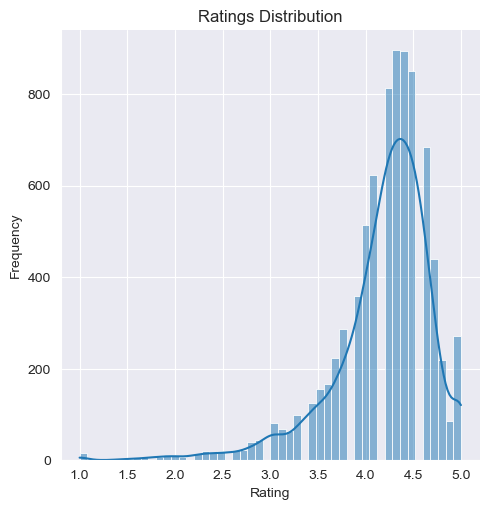

In [22]:
# Distribuzione dei dati:
sns.displot(df['Rating'], kde=True, bins=50)
plt.title('Ratings Distribution')
plt.ylabel('Frequency')

# Si nota come la distribuzione sia approssimabile ad una gaussiana ed i valori che hanno piu occorrenze cadono 
# nell'intervallo [mean - std , mean + std], ovvero [3.7 , 4.7]

***Reviews***

In [23]:
df['Reviews'].value_counts().head(10) 

# Si nota come è molto frequente che non ci siano recensioni (0 recensioni è il valore che si ripete di piu) o che 
# siano basse

0    593
1    272
2    213
3    170
4    137
5    108
6     94
7     88
8     71
9     64
Name: Reviews, dtype: int64

In [24]:
# Media delle recensioni rilasciate
int(df['Reviews'].mean()) 

# Il fatto che la media sia cosi alta rispetto al fatto che è frequente avere recensioni basse mi fa capire che ci sono 
# poche applicazioni che da sole ricevono tantissime recensioni

216781

In [25]:
# Deviazione standard
int(df['Reviews'].std())

# Il pensiero precedente è confermato dal fatto che si ha una dispersione molto elevata, causata probabilmente da 
# valori marginali (anomali) 

1831336

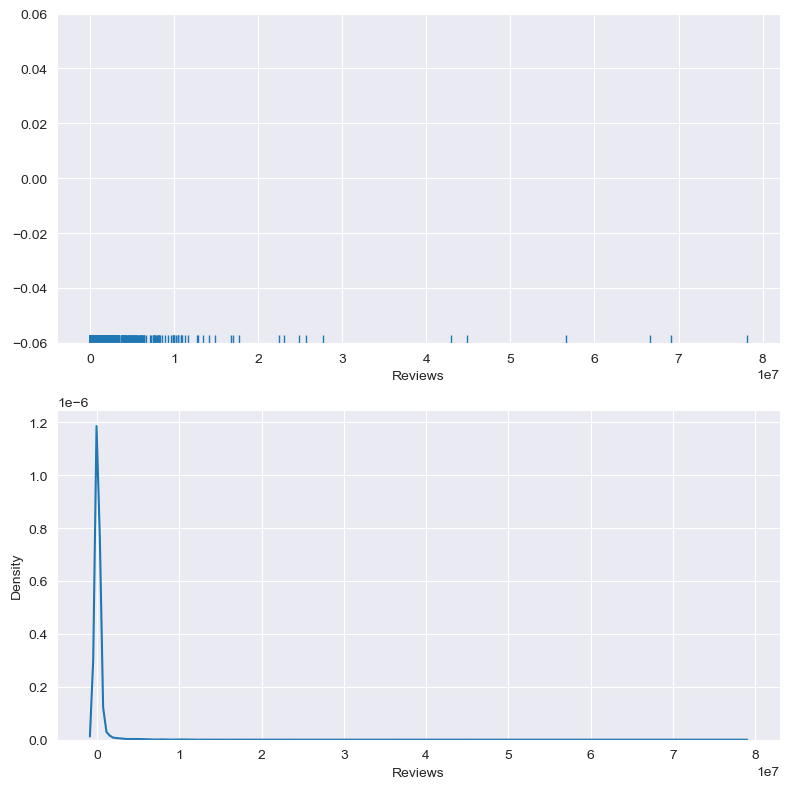

In [26]:
# Distribuzione

fig,ax = plt.subplots(nrows=2, ncols=1, figsize=(8,8))

sns.rugplot(df['Reviews'], ax=ax[0])
sns.kdeplot(df['Reviews'], ax=ax[1])

plt.tight_layout()

# Riscontro grafico delle ipotesi precedenti:
# la maggior parte delle App riceve poche recensioni che si accumulano tra 0 e 10 Milioni

In [27]:
df[df['Reviews'] > 40000000].sort_values(by='Reviews', ascending=False)

# Vediamo subito quali sono le App che hanno ricevuto il maggior numero di recensioni, che sono i valori marginali 
# della parte destra del grafico della densità di distribuzione

,App,Rating,Reviews,Installs,Price,Type,Category
1872,Facebook,4.1,78158306,1000000000,0.0,Free,SOCIAL
279,WhatsApp Messenger,4.4,69119316,1000000000,0.0,Free,COMMUNICATION
1913,Instagram,4.5,66577446,1000000000,0.0,Free,SOCIAL
304,Messenger – Text and Video Chat for Free,4.0,56646578,1000000000,0.0,Free,COMMUNICATION
1354,Clash of Clans,4.6,44893888,100000000,0.0,Free,GAME
3022,Clean Master- Space Cleaner & Antivirus,4.7,42916526,500000000,0.0,Free,TOOLS


In [28]:
df[(df['Reviews'] > 20000000) & (df['Reviews'] < 30000000)].sort_values(by='Reviews', ascending=False)

# Anche le App con nr. di rensioni comprese tra 20 e 30 Milioni possono essere considerati casi speciali

,App,Rating,Reviews,Installs,Price,Type,Category
1349,Subway Surfers,4.5,27725352,1000000000,0.0,Free,GAME
2749,YouTube,4.3,25655305,1000000000,0.0,Free,VIDEO_PLAYERS
6382,"Security Master - Antivirus, VPN, AppLock, Boo...",4.7,24900999,500000000,0.0,Free,TOOLS
1353,Clash Royale,4.6,23136735,100000000,0.0,Free,GAME
1347,Candy Crush Saga,4.4,22430188,500000000,0.0,Free,GAME


***Installs***

In [29]:
# Nr. di installazioni in ordine di frequenza
df['Installs'].value_counts()

# Si nota come 1 Milione è il valore che si ripete maggiormente

1000000       1417
100000        1113
10000         1030
10000000       937
1000           888
100            709
5000000        607
500000         504
50000          469
5000           468
10             385
500            328
50000000       204
50             204
100000000      189
5               82
1               67
500000000       24
1000000000      20
0               15
Name: Installs, dtype: int64

In [30]:
# Media delle installazioni 
int(df['Installs'].mean())

7797363

In [31]:
# Il numero massimo e minimo di installazioni
print(df['Installs'].max())
print(df['Installs'].min())

1000000000
0


In [32]:
# Deviazione Standard
int(df['Installs'].std())

53767003

<AxesSubplot:xlabel='Installs'>

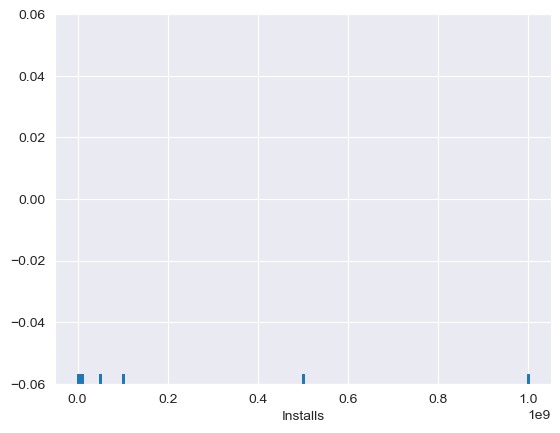

In [33]:
sns.rugplot(df['Installs'])

# Si nota subito come ci siano due valori anomali (1 Miliardo di installazioni e 500 Milioni)
# Il resto si concentra tra 0 e 100 Milioni

In [34]:
# Media escludendo i valori anomali
mean_i = int(df[df['Installs'] <= 100000000]['Installs'].mean())   # media delle installazioni sotto i 100 Milioni 
print(mean_i)

# Risulta la media delle installazioni escludendo quelle applicazioni che hanno performato in modo eccezionale
# da questo punto di vista

4505254


In [35]:
# Deviazione Standard escludendo i valori anomali
std_i = int(df[df['Installs'] <= 100000000]['Installs'].std())
print(std_i)

15517595


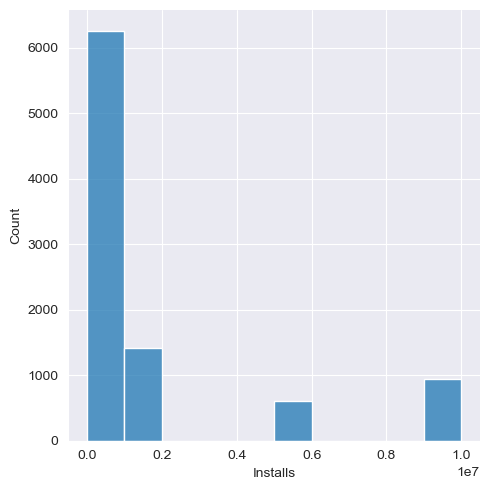

In [36]:
# Distribuzione
sns.displot(df[(df['Installs'] < (mean_i+std_i))]['Installs'], bins=10)

# Coerentemente con i risultati precedenti si vede come la maggior parte delle App riscontrano un numero di installazioni 
# intorno al milione

***Price***

In [37]:
print('Il prezzo massimo è: ', df[df['Type'] == 'Paid']['Price'].max(), '\n')
print('Il prezzo minimo è: ', df[df['Type'] == 'Paid']['Price'].min(), '\n')
print('Il prezzo medio è: ', round(df[df['Type'] == 'Paid']['Price'].mean(),2), '\n')
print('La deviazione standard è: ', round(df[df['Type'] == 'Paid']['Price'].std(),2), '\n')

Il prezzo massimo è:  400.0 

Il prezzo minimo è:  0.99 

Il prezzo medio è:  14.06 

La deviazione standard è:  58.82 



<AxesSubplot:xlabel='Price', ylabel='Density'>

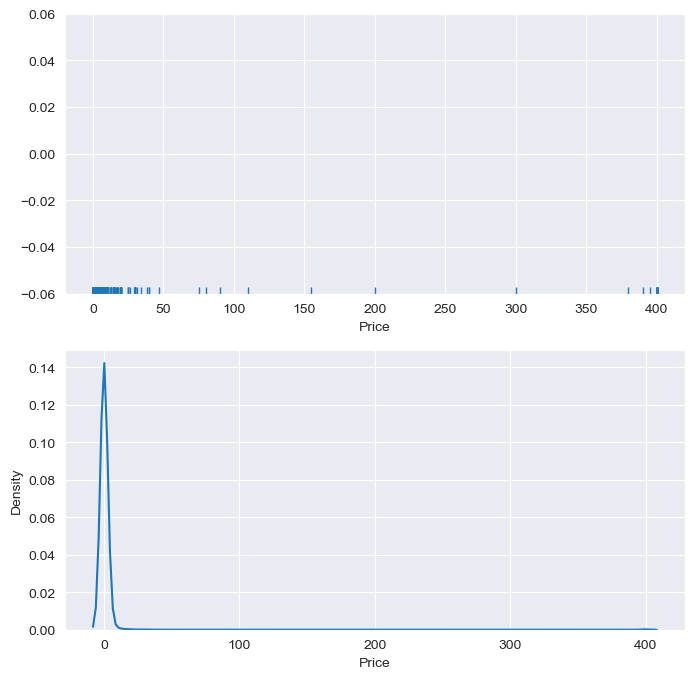

In [38]:
fig,ax = plt.subplots(nrows=2, ncols=1, figsize=(8,8))

sns.rugplot(df[df['Price'] != 'Free']['Price'], ax=ax[0])
sns.kdeplot(df[df['Price'] != 'Free']['Price'], ax=ax[1])

# Si nota che la maggior parte dei prezzi delle App a pagamento si aggira tra $0.99 e $25

In [39]:
# Rifaccio i calcoli escludendo i valori anomali
print('Il prezzo massimo è: ', df[(df['Type'] == 'Paid') & (df['Price'] <= 25)]['Price'].max(), '\n')
print('Il prezzo minimo è: ', df[(df['Type'] == 'Paid') & (df['Price'] <= 25)]['Price'].min(), '\n')
print('Il prezzo medio è: ', round(df[(df['Type'] == 'Paid') & (df['Price'] <= 25)]['Price'].mean(),2), '\n')
print('La deviazione standard è: ', round(df[(df['Type'] == 'Paid') & (df['Price'] <= 25)]['Price'].std(),2), '\n')

Il prezzo massimo è:  24.99 

Il prezzo minimo è:  0.99 

Il prezzo medio è:  3.88 

La deviazione standard è:  3.7 



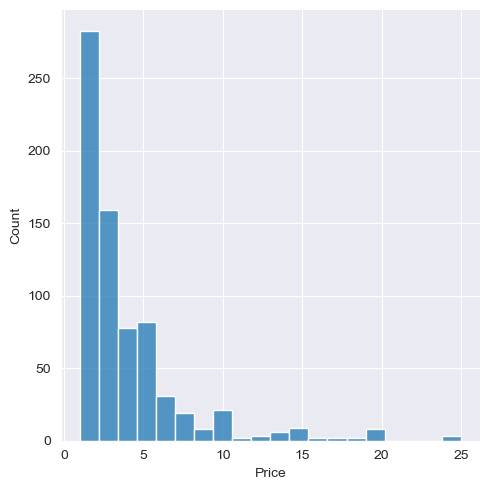

In [40]:
# Distribuzione
sns.displot(df[(df['Type'] == 'Paid') & (df['Price'] <= 25)]['Price'], bins=20)

# Si vede come la maggior parte delle App a pagamento ha un prezzo tra $0.99 e $4.99

### ***Variabili qualitative***

***Type***

Free    8906
Paid     754
Name: Type, dtype: int64 


In percentuale: 

Free    92.2
Paid     7.8
Name: Type, dtype: float64 




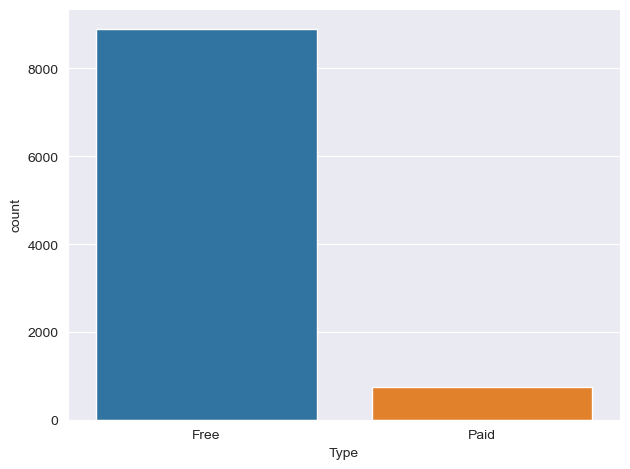

In [41]:
# Sono piu le App a pagamento o gratuite?

valori = df['Type'].value_counts()
print(valori, '\n\n')
valori_percentuale = valori.apply(lambda x: x / len(df) * 100)
print('In percentuale:', '\n')
print(round(valori_percentuale,1), '\n\n')

sns.countplot(x='Type', data=df)
plt.tight_layout()
plt.show()

# Si nota come le App gratuite sono molto piu frequenti di quelle a pagamento

***Category***

FAMILY             1877
GAME                946
TOOLS               829
BUSINESS            420
MEDICAL             395
PERSONALIZATION     376
PRODUCTIVITY        374
LIFESTYLE           369
FINANCE             345
SPORTS              325
Name: Category, dtype: int64 



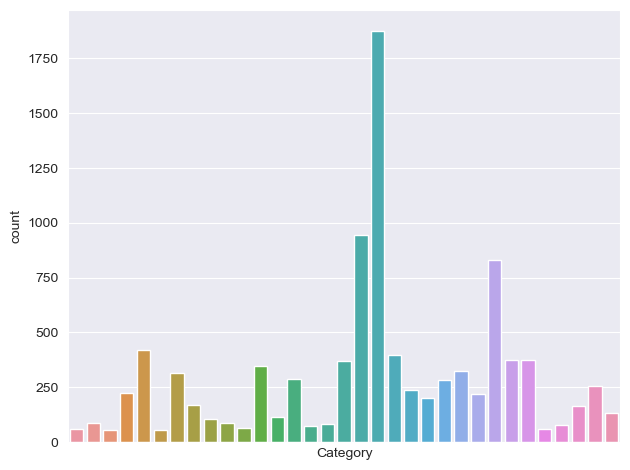

In [42]:
# Le 10 categorie piu frequenti
print(df['Category'].value_counts().head(10), '\n')
sns.countplot(x='Category', data=df)
plt.xticks([])
plt.tight_layout()
plt.show()

### ***Correlazioni tra i dati numerici del DataFrame***

            Rating   Reviews  Installs     Price
Rating    1.000000  0.055159  0.040282 -0.021054
Reviews   0.055159  1.000000  0.625059 -0.007590
Installs  0.040282  0.625059  1.000000 -0.009410
Price    -0.021054 -0.007590 -0.009410  1.000000 



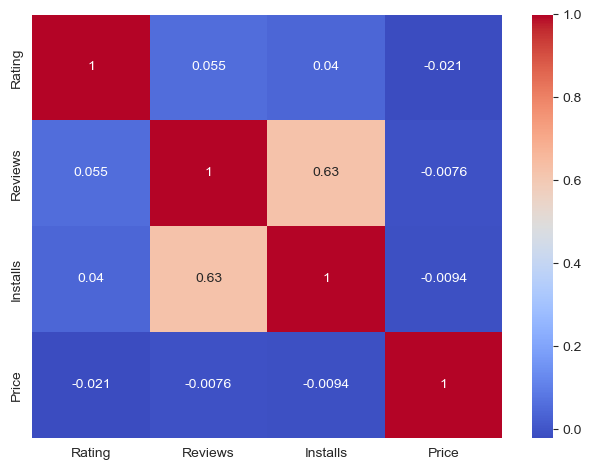

In [43]:
print(df[['Rating','Reviews','Installs','Price']].corr(), '\n')
sns.heatmap(data=df[['Rating','Reviews','Installs','Price']].corr(), annot=True, cmap='coolwarm')
plt.tight_layout()
plt.show()

# Gli unici dati che mostrano una buona correlazione sono il numero di installazioni e il numero di recensioni
# Coerente con il fatto che solitamente vengono scaricate le App con il maggior numero di recensioni. Curioso anche il 
# fatto che sembri avere piu importanza l'elevato numero di recensioni rispetto all'elevata valutazione

### ***App piu popolari***

In [44]:
len(df[df['Installs'] == df['Installs'].max()]['App'].unique())

# ci sono 20 App che hanno il numero massimo di downloads 

20

In [45]:
df.sort_values(by=['Reviews','Installs'], ascending=False).head(10)

# questa lista da piu importanza al numero di recensioni

,App,Rating,Reviews,Installs,Price,Type,Category
1872,Facebook,4.1,78158306,1000000000,0.0,Free,SOCIAL
279,WhatsApp Messenger,4.4,69119316,1000000000,0.0,Free,COMMUNICATION
1913,Instagram,4.5,66577446,1000000000,0.0,Free,SOCIAL
304,Messenger – Text and Video Chat for Free,4.0,56646578,1000000000,0.0,Free,COMMUNICATION
1354,Clash of Clans,4.6,44893888,100000000,0.0,Free,GAME
3022,Clean Master- Space Cleaner & Antivirus,4.7,42916526,500000000,0.0,Free,TOOLS
1349,Subway Surfers,4.5,27725352,1000000000,0.0,Free,GAME
2749,YouTube,4.3,25655305,1000000000,0.0,Free,VIDEO_PLAYERS
6382,"Security Master - Antivirus, VPN, AppLock, Boo...",4.7,24900999,500000000,0.0,Free,TOOLS
1353,Clash Royale,4.6,23136735,100000000,0.0,Free,GAME


In [46]:
df[df['Installs'] == df['Installs'].max()]

# questa lista da piu importanza al numero di downloads

,App,Rating,Reviews,Installs,Price,Type,Category
144,Google Play Books,3.9,1433233,1000000000,0.0,Free,BOOKS_AND_REFERENCE
279,WhatsApp Messenger,4.4,69119316,1000000000,0.0,Free,COMMUNICATION
304,Messenger – Text and Video Chat for Free,4.0,56646578,1000000000,0.0,Free,COMMUNICATION
308,Skype - free IM & video calls,4.1,10484169,1000000000,0.0,Free,COMMUNICATION
320,Google Chrome: Fast & Secure,4.3,9643041,1000000000,0.0,Free,COMMUNICATION
347,Gmail,4.3,4604483,1000000000,0.0,Free,COMMUNICATION
359,Hangouts,4.0,3419513,1000000000,0.0,Free,COMMUNICATION
1349,Subway Surfers,4.5,27725352,1000000000,0.0,Free,GAME
1872,Facebook,4.1,78158306,1000000000,0.0,Free,SOCIAL
1878,Google+,4.2,4831125,1000000000,0.0,Free,SOCIAL


In [47]:
df1 = df.sort_values(by=['Reviews','Installs'], ascending=False).head(10)
df2 = df[df['Installs'] == df['Installs'].max()]

df1[df1['App'].isin(df2['App'])]['App']

# incrocio i valori ottenuti dai due dataframe precedenti per scoprire quali sono le App piu popolari in base al nr.
# di downloads e recensioni

1872                                    Facebook
279                           WhatsApp Messenger
1913                                   Instagram
304     Messenger – Text and Video Chat for Free
1349                              Subway Surfers
2749                                     YouTube
Name: App, dtype: object

In [48]:
df[(df['Reviews'] > df['Reviews'].mean()) & (df['Rating'] > df['Rating'].mean())]['App'].count()

# scopro quante sono le App con nr. di recensioni e valutazione sopra la media

880

In [49]:
# Voglio incrociare queste App con quelle trovate precedentemente

ser1 = df[(df['Reviews'] > df['Reviews'].mean()) & (df['Rating'] > df['Rating'].mean())]['App']
ser2 = df1[df1['App'].isin(df2['App'])]['App']

ser1[ser1.isin(ser2)]

# Queste in definitiva sono le App non solo piu popolari, quindi ad elevato nr. di recensioni e downloads, ma anche con 
# valutazione sopra la media

279     WhatsApp Messenger
1349        Subway Surfers
1913             Instagram
2749               YouTube
Name: App, dtype: object

### ***App a pagamento***

In [50]:
df[df['Type'] != 'Free'].sort_values(by=['Installs','Reviews'], ascending=False).head(10)

# queste sono le 10 App a pagamento piu installate e con piu recensioni

,App,Rating,Reviews,Installs,Price,Type,Category
1616,Minecraft,4.5,2376564,10000000,6.99,Paid,FAMILY
3049,Hitman Sniper,4.6,408292,10000000,0.99,Paid,GAME
6263,Grand Theft Auto: San Andreas,4.4,348962,1000000,6.99,Paid,GAME
7683,Bloons TD 5,4.6,190086,1000000,2.99,Paid,FAMILY
8501,Where's My Water?,4.7,188740,1000000,1.99,Paid,FAMILY
1617,Card Wars - Adventure Time,4.3,129603,1000000,2.99,Paid,FAMILY
4390,True Skate,4.4,129409,1000000,1.99,Paid,SPORTS
4519,Five Nights at Freddy's,4.6,100805,1000000,2.99,Paid,GAME
2514,Beautiful Widgets Pro,4.2,97890,1000000,2.49,Paid,PERSONALIZATION
7627,DraStic DS Emulator,4.6,87766,1000000,4.99,Paid,GAME


In [51]:
# Controllo se c'è correlazione tra il prezzo delle App e il numero di downloads

df1 = df[df['Type'] != 'Free']
print(df1[['Installs','Price']].corr(), '\n')

# Il fatto che abbia valore negativo mi fa capire che se aumenta il prezzo il numero di downloads diminuisce, tuttavia la 
# correlazione è davvero bassissima quindi sembrerebbe che la gente non dia peso al prezzo

# Vediamo che succede se il prezzo supera la media di un valore pari alla deviazione standard

media = df[df['Type'] != 'Free']['Price'].mean()
std = df[df['Type'] != 'Free']['Price'].std()

df1 = df[(df['Type'] != 'Free') & (df['Price'] > media+std)]
print(df1[['Installs','Price']].corr(), '\n')

# Si nota come cresce la correlazione (anche se non è molto significativa) e diventa positiva. Quindi potrebbe significare
# che le persone che sono disposte a spendere molti soldi per un'App non danno molto peso al prezzo 

          Installs     Price
Installs  1.000000 -0.021551
Price    -0.021551  1.000000 

          Installs     Price
Installs  1.000000  0.253343
Price     0.253343  1.000000 



In [52]:
# Sono interessato a vedere quali App hanno il miglior rapporto prezzo / nr. downloads

df1 = df[(df['Price'] > 0) & (df['Installs'] > 0)]
df1 = df1.assign(Price_Installs = df1['Price'] / df1['Installs'])
df1.sort_values('Price_Installs', ascending=True).head(10)

# Piu è basso il rapporto piu ci sono persone sono disposte a spendere per l'App 

,App,Rating,Reviews,Installs,Price,Type,Category,Price_Installs
3049,Hitman Sniper,4.6,408292,10000000,0.99,Paid,GAME,9.900000e-08
1616,Minecraft,4.5,2376564,10000000,6.99,Paid,FAMILY,6.990000e-07
5531,Infinity Dungeon VIP,4.3,21804,1000000,0.99,Paid,FAMILY,9.900000e-07
7993,Stickman Legends: Shadow Wars,4.4,38419,1000000,0.99,Paid,GAME,9.900000e-07
9503,Fruit Ninja Classic,4.3,85468,1000000,0.99,Paid,GAME,9.900000e-07
7988,League of Stickman 2018- Ninja Arena PVP(Dream...,4.4,32496,1000000,0.99,Paid,GAME,9.900000e-07
3220,Cut the Rope GOLD,4.6,61264,1000000,0.99,Paid,FAMILY,9.900000e-07
7974,Lost Journey (Dreamsky),4.5,32344,1000000,0.99,Paid,GAME,9.900000e-07
2516,HD Widgets,4.3,58617,1000000,0.99,Paid,PERSONALIZATION,9.900000e-07
3764,Zombie Avengers:(Dreamsky)Stickman War Z,4.3,13604,1000000,0.99,Paid,GAME,9.900000e-07


### ***Analisi delle categorie di App***

***Categorie di App piu popolari***

In [53]:
# Categorie delle App con il maggior numero di downloads

pd.Series(df[df['Installs'] == df['Installs'].max()]['Category'].unique())

0     BOOKS_AND_REFERENCE
1           COMMUNICATION
2                    GAME
3                  SOCIAL
4             PHOTOGRAPHY
5        TRAVEL_AND_LOCAL
6                   TOOLS
7            PRODUCTIVITY
8           VIDEO_PLAYERS
9                  FAMILY
10     NEWS_AND_MAGAZINES
dtype: object

In [54]:
# Categorie che in totale hanno ricevuto il maggior numero di downloads e recensioni

df1 = df.groupby('Category').sum()[['Reviews','Installs']].sort_values(by=['Reviews','Installs'], ascending=False).reset_index().head(10)
df2 = df.groupby('Category').sum()[['Reviews','Installs']].sort_values(by=['Installs','Reviews'], ascending=False).reset_index().head(10)

df1[df1['Category'].isin(df2['Category'])]

,Category,Reviews,Installs
0,GAME,590772190,13457924415
1,COMMUNICATION,285824082,11038276251
2,TOOLS,229471630,8102771915
3,SOCIAL,227936355,5487867902
4,FAMILY,193674256,6227542505
5,PHOTOGRAPHY,105580491,4658148655
6,VIDEO_PLAYERS,67644444,3931902720
7,PRODUCTIVITY,55590856,5793091369


***Categorie con il maggior numero di App con valutazioni sopra la media***

In [55]:
df[df['Rating'] > df['Rating'].mean()].groupby('Category').size().sort_values(ascending=False).head(10)

Category
FAMILY                1026
GAME                   625
TOOLS                  390
PERSONALIZATION        228
PRODUCTIVITY           200
MEDICAL                190
FINANCE                182
HEALTH_AND_FITNESS     175
SPORTS                 172
PHOTOGRAPHY            166
dtype: int64

***Categorie con il maggior numero di App gratuite***

***Categorie con il maggior numero di App a pagamento***

In [56]:
df[df['Type'] == 'Free'].groupby('Category').size().sort_values(ascending=False).head(10)

Category
FAMILY             1692
GAME                864
TOOLS               751
BUSINESS            408
LIFESTYLE           350
PRODUCTIVITY        346
FINANCE             328
MEDICAL             313
SPORTS              301
PERSONALIZATION     295
dtype: int64

In [57]:
df[df['Type'] == 'Paid'].groupby('Category').size().sort_values(ascending=False).head(10)

Category
FAMILY                 185
MEDICAL                 82
GAME                    82
PERSONALIZATION         81
TOOLS                   78
BOOKS_AND_REFERENCE     28
PRODUCTIVITY            28
COMMUNICATION           27
SPORTS                  24
LIFESTYLE               19
dtype: int64

Si potrebbe anche risolvere creando una ***TABELLA PIVOT*** ad esempio

In [58]:
df.groupby(['Category','Type']).count()['App'].unstack().sort_values('Free', ascending=False)

# Vediamo come abbiamo gli stessi valori dei 2 output precedenti 
# Ad esemio nella categoria FAMILY il numero di App gratuite è 1692 mentre quelle a pagamento 185

Type,Free,Paid
Category,,
FAMILY,1692.0,185.0
GAME,864.0,82.0
TOOLS,751.0,78.0
BUSINESS,408.0,12.0
LIFESTYLE,350.0,19.0
PRODUCTIVITY,346.0,28.0
FINANCE,328.0,17.0
MEDICAL,313.0,82.0
SPORTS,301.0,24.0


***App gratuite piu popolari per ogni categoria***

> **```df[df['Type'] == 'Free'] --> ```** seleziono solo le App gratuite

> **```.groupby('Category') --> ```** raggruppo i dati in base alla categoria

> **```.apply(lambda x: x.sort_values('Installs',ascending=False).head(1)) --> ```** ordino gli elementi del dataframe in ordine decrescente in base al numero di downloads e seleziono solo la prima riga. 

La funzione **```apply()```** cosi costruita viene applicata a ciascun gruppo. In questo modo viene creato un nuovo Dataframe con una sola riga per ogni categoria con l'app gratuita più popolare

In [59]:
df[df['Type'] == 'Free'].groupby('Category').apply(lambda x: x.sort_values(['Installs','Reviews'],ascending=False).head(1))

,,App,Rating,Reviews,Installs,Price,Type,Category
Category,,,,,,,,
ART_AND_DESIGN,2,Sketch - Draw & Paint,4.5,215644,50000000,0.0,Free,ART_AND_DESIGN
AUTO_AND_VEHICLES,68,"Android Auto - Maps, Media, Messaging & Voice",4.2,271920,10000000,0.0,Free,AUTO_AND_VEHICLES
BEAUTY,113,Beauty Camera - Selfie Camera,4.0,113715,10000000,0.0,Free,BEAUTY
BOOKS_AND_REFERENCE,144,Google Play Books,3.9,1433233,1000000000,0.0,Free,BOOKS_AND_REFERENCE
BUSINESS,182,OfficeSuite : Free Office + PDF Editor,4.3,1002861,100000000,0.0,Free,BUSINESS
COMICS,3655,LINE WEBTOON - Free Comics,4.5,1013944,10000000,0.0,Free,COMICS
COMMUNICATION,279,WhatsApp Messenger,4.4,69119316,1000000000,0.0,Free,COMMUNICATION
DATING,5926,Zoosk Dating App: Meet Singles,4.0,516917,10000000,0.0,Free,DATING
EDUCATION,616,"Learn languages, grammar & vocabulary with Mem...",4.7,1107948,10000000,0.0,Free,EDUCATION


***App a pagamento piu popolari per ogni categoria***

In [60]:
df[df['Type'] == 'Paid'].groupby('Category').apply(lambda x: x.sort_values(['Installs','Reviews'],ascending=False).head(1))

,,App,Rating,Reviews,Installs,Price,Type,Category
Category,,,,,,,,
ART_AND_DESIGN,3686,X Launcher Pro - IOS Style Theme & Control Center,4.8,1216,10000,1.99,Paid,ART_AND_DESIGN
AUTO_AND_VEHICLES,3187,Ulysse Speedometer Pro,4.6,4140,50000,1.99,Paid,AUTO_AND_VEHICLES
BOOKS_AND_REFERENCE,4250,Al'Quran Bahasa Indonesia PRO,4.7,1340,10000,4.49,Paid,BOOKS_AND_REFERENCE
BUSINESS,218,TurboScan: scan documents and receipts in PDF,4.7,11442,100000,4.99,Paid,BUSINESS
COMMUNICATION,6201,Threema,4.5,51110,1000000,2.99,Paid,COMMUNICATION
DATING,416,"Moco+ - Chat, Meet People",4.2,1546,10000,3.99,Paid,DATING
EDUCATION,627,Toca Life: Hospital,4.7,3528,100000,3.99,Paid,EDUCATION
ENTERTAINMENT,705,My Talking Pet,4.6,6238,100000,4.99,Paid,ENTERTAINMENT
EVENTS,5485,BP Fitness Lead Scanner,NaN,0,1,109.99,Paid,EVENTS


***Prezzo medio delle App a pagamento per ogni categoria***

In [61]:
df[df['Type'] != 'Free'].groupby('Category')['Price'].mean().sort_values(ascending=False)

Category
FINANCE                170.637059
LIFESTYLE              124.256316
EVENTS                 109.990000
BUSINESS                14.607500
FAMILY                  13.026162
MEDICAL                 11.984268
PRODUCTIVITY             8.961786
PHOTOGRAPHY              6.225263
MAPS_AND_NAVIGATION      5.390000
SOCIAL                   5.323333
PARENTING                4.790000
AUTO_AND_VEHICLES        4.490000
HEALTH_AND_FITNESS       4.290000
BOOKS_AND_REFERENCE      4.277500
FOOD_AND_DRINK           4.240000
SPORTS                   4.166667
TRAVEL_AND_LOCAL         4.162500
DATING                   4.090000
WEATHER                  4.052500
ENTERTAINMENT            3.990000
EDUCATION                3.990000
GAME                     3.467195
TOOLS                    3.426282
COMMUNICATION            3.079259
SHOPPING                 2.740000
VIDEO_PLAYERS            2.615000
NEWS_AND_MAGAZINES       1.990000
ART_AND_DESIGN           1.990000
PERSONALIZATION          1.857778
LIBRA

***Categorie con il maggior numero di App con un prezzo superiore alla media***

In [62]:
df[df['Price'] > df['Price'].mean()].groupby('Category').size().sort_values(ascending=False).head(10)

Category
FAMILY                 157
MEDICAL                 71
TOOLS                   61
GAME                    57
PERSONALIZATION         44
BOOKS_AND_REFERENCE     24
PRODUCTIVITY            23
COMMUNICATION           20
SPORTS                  20
PHOTOGRAPHY             19
dtype: int64

### ***Altre Tabelle Pivot interessanti***

> **```df.groupby(['Category','Rating']).count()```** si genera un DataFrame a due livelli di indice. Quello esterno sarà dato dal primo elemento della lista, quello esterno dal secondo. Successivamente si raggruppano le occorrenze

> **```.unstack()```** sposta i valore dell'indice interno sulle colonne, generando una ***tabella pivot***

Si tratta di un modo veloce per reperire informazioni sul numero di App che hanno certe caratteristiche. Ad esempio nel primo caso posso controllare il numero di App che appartiene ad una certa categoria e allo stesso tempo ha avuto una certa valutazione. In base a come fa piu comodo si puo scegliere di invertire l'ordine delle colonne nella lista, tenendo conto che la prima info. formerà le righe della ***tabella pivot*** e la seconda le colonne.

In [63]:
df.groupby(['Category','Rating']).count()['App'].unstack()

Rating,1.0,1.2,1.4,1.5,1.6,1.7,1.8,1.9,2.0,2.1,...,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5.0
Category,,,,,,,,,,,,,,,,,,,,,
ART_AND_DESIGN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.0,7.0,4.0,7.0,4.0,3.0,12.0,5.0,NaN,1.0
AUTO_AND_VEHICLES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,7.0,7.0,6.0,5.0,11.0,NaN,5.0,5.0,NaN
BEAUTY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,4.0,3.0,3.0,5.0,3.0,6.0,1.0,1.0,NaN
BOOKS_AND_REFERENCE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.0,12.0,9.0,17.0,23.0,23.0,20.0,11.0,4.0,6.0
BUSINESS,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,...,19.0,21.0,22.0,31.0,17.0,17.0,14.0,9.0,3.0,18.0
COMICS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,3.0,1.0,9.0,7.0,4.0,5.0,2.0,NaN,2.0
COMMUNICATION,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23.0,34.0,42.0,30.0,20.0,12.0,1.0,6.0,NaN,5.0
DATING,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,17.0,16.0,5.0,11.0,4.0,2.0,6.0,5.0,1.0,6.0
EDUCATION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.0,14.0,13.0,14.0,13.0,13.0,11.0,1.0,2.0,NaN


In [64]:
df.groupby(['Category','Installs']).count()['App'].unstack()

Installs,0,1,5,10,50,100,500,1000,5000,10000,50000,100000,500000,1000000,5000000,10000000,50000000,100000000,500000000,1000000000
Category,,,,,,,,,,,,,,,,,,,,
ART_AND_DESIGN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,3.0,5.0,11.0,6.0,18.0,4.0,4.0,3.0,4.0,1.0,NaN,NaN,NaN
AUTO_AND_VEHICLES,NaN,1.0,2.0,5.0,1.0,6.0,3.0,8.0,2.0,6.0,5.0,23.0,5.0,13.0,3.0,2.0,NaN,NaN,NaN,NaN
BEAUTY,NaN,NaN,NaN,NaN,1.0,5.0,1.0,1.0,3.0,13.0,5.0,8.0,6.0,8.0,1.0,1.0,NaN,NaN,NaN,NaN
BOOKS_AND_REFERENCE,NaN,1.0,7.0,19.0,3.0,7.0,9.0,34.0,16.0,25.0,12.0,20.0,16.0,20.0,9.0,19.0,NaN,4.0,NaN,1.0
BUSINESS,1.0,5.0,18.0,42.0,25.0,76.0,23.0,49.0,17.0,46.0,11.0,30.0,8.0,34.0,15.0,13.0,5.0,2.0,NaN,NaN
COMICS,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,4.0,11.0,7.0,10.0,5.0,11.0,4.0,1.0,NaN,NaN,NaN,NaN
COMMUNICATION,NaN,1.0,2.0,19.0,5.0,33.0,11.0,22.0,19.0,25.0,10.0,19.0,9.0,41.0,22.0,43.0,7.0,16.0,5.0,6.0
DATING,NaN,2.0,1.0,10.0,6.0,17.0,12.0,12.0,9.0,21.0,5.0,24.0,18.0,19.0,6.0,8.0,NaN,NaN,NaN,NaN
EDUCATION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,5.0,6.0,21.0,11.0,41.0,12.0,8.0,NaN,NaN,NaN,NaN


In [65]:
df.groupby(['Installs','Rating']).count()['App'].unstack()

Rating,1.0,1.2,1.4,1.5,1.6,1.7,1.8,1.9,2.0,2.1,...,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5.0
Installs,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
5,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0
10,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,1.0,4.0,NaN,48.0
50,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,3.0,NaN,2.0,3.0,2.0,NaN,3.0,NaN,32.0
100,5.0,NaN,NaN,1.0,NaN,2.0,NaN,NaN,1.0,NaN,...,6.0,10.0,12.0,9.0,13.0,17.0,15.0,18.0,11.0,112.0
500,3.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,...,4.0,12.0,9.0,20.0,13.0,16.0,13.0,14.0,7.0,27.0
1000,3.0,1.0,2.0,1.0,2.0,1.0,4.0,5.0,5.0,2.0,...,40.0,40.0,41.0,48.0,46.0,57.0,61.0,41.0,28.0,37.0
5000,NaN,NaN,1.0,NaN,NaN,NaN,1.0,3.0,1.0,2.0,...,26.0,28.0,38.0,40.0,35.0,21.0,25.0,21.0,8.0,3.0
10000,NaN,NaN,NaN,NaN,NaN,3.0,1.0,2.0,3.0,2.0,...,62.0,84.0,85.0,86.0,94.0,76.0,57.0,22.0,11.0,1.0


Type          Free   Paid
Installs                 
0              5.0   10.0
1             46.0   21.0
5             70.0   12.0
10           315.0   70.0
50           170.0   34.0
100          616.0   93.0
500          288.0   40.0
1000         751.0  137.0
5000         403.0   65.0
10000        913.0  117.0
50000        429.0   40.0
100000      1031.0   82.0
500000       493.0   11.0
1000000     1397.0   20.0
5000000      607.0    NaN
10000000     935.0    2.0
50000000     204.0    NaN
100000000    189.0    NaN
500000000     24.0    NaN
1000000000    20.0    NaN 


                App  Rating  Reviews  Installs  Price  Type Category
1616      Minecraft     4.5  2376564  10000000   6.99  Paid   FAMILY
3049  Hitman Sniper     4.6   408292  10000000   0.99  Paid     GAME 


6263                        Grand Theft Auto: San Andreas
7683                                          Bloons TD 5
8501                                    Where's My Water?
1617                           Card Wars 

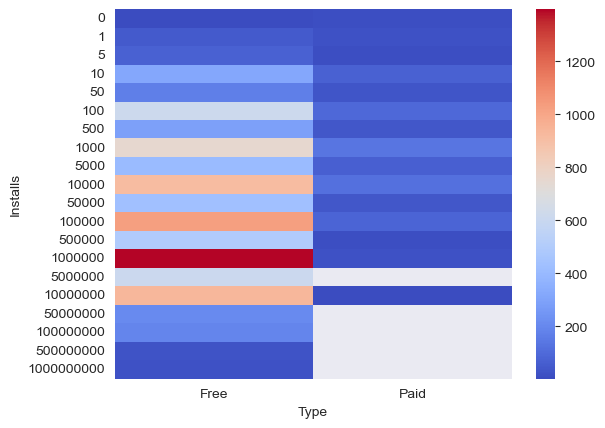

In [66]:
df4 = df.groupby(['Installs','Type']).count()['App'].unstack()
print(df4, '\n\n')
sns.heatmap(data=df4, cmap='coolwarm')  # si nota come le App a pagamento vengono installate molto meno di quelle gratuite


# Le uniche due App a pagamento che sono state installate tanto sono:
print(df[(df['Type'] == 'Paid') & (df['Installs'] == 10000000)], '\n\n')

# Poi ci sono subito dopo le seguenti:
print(df[(df['Type'] == 'Paid') & (df['Installs'] == 1000000)].sort_values('Reviews',ascending=False)['App'], '\n\n')

___
# Data-driven Decision Making

***Alla luce dell'analisi effettuata seguono delle considerazioni per aiutare gli stakeholder nella creazione di una nuova App:***

> **```L'analisi svolta permette di trovare una risposta alle domande che suguono (solo per la prima riporterò nuovamente il codice scritto, per le altre basterà visualizzare gli script delle celle precedenti ed i relativi output)```**

1. ***Capire quali sono i settori in cui c'è più e meno concorrenza per capire in quali si hanno maggiori opportunità di seccesso***

In [67]:
df1 = df.groupby('Category').sum()[['Reviews','Installs']].sort_values(by=['Reviews','Installs'], ascending=False).reset_index().head(10)
df2 = df.groupby('Category').sum()[['Reviews','Installs']].sort_values(by=['Installs','Reviews'], ascending=False).reset_index().head(10)

print("\033[1m\033[94m  Settori in cui c'è piu concorrenza:  \033[0m", '\n')
print(df1[df1['Category'].isin(df2['Category'])]['Category'], '\n\n')


df1 = df.groupby('Category').sum()[['Reviews','Installs']].sort_values(by=['Reviews','Installs'], ascending=True).reset_index().head(10)
df2 = df.groupby('Category').sum()[['Reviews','Installs']].sort_values(by=['Installs','Reviews'], ascending=True).reset_index().head(10)

print("\033[1m\033[94m  Settori in cui c'è meno concorrenza:  \033[0m", '\n')
print(df1[df1['Category'].isin(df2['Category'])]['Category'], '\n\n')

  Settori in cui c'è piu concorrenza:   

0             GAME
1    COMMUNICATION
2            TOOLS
3           SOCIAL
4           FAMILY
5      PHOTOGRAPHY
6    VIDEO_PLAYERS
7     PRODUCTIVITY
Name: Category, dtype: object 


  Settori in cui c'è meno concorrenza:   

0                EVENTS
1                BEAUTY
2    LIBRARIES_AND_DEMO
3             PARENTING
4     AUTO_AND_VEHICLES
5               MEDICAL
6        ART_AND_DESIGN
7        HOUSE_AND_HOME
8                COMICS
9                DATING
Name: Category, dtype: object 




2. ***In base al settore scelto, capire quali sono i competitor che hanno ottenuto ottimi risultati e che quindi meritano di essere analizzati***

3. ***Analizzare il successo delle App in base al numero di installazioni/downloads e valutazioni per identificare le App più popolari e capire come replicare il loro successo***

4. ***Trovare il valor medio delle valutazioni e del numero di recensioni delle App per identificare i concorrenti di successo e capire come posizionarsi rispetto a loro***

5. ***Trovare la percentuale di App gratuite e a pagamento per decidere quale modello di business adottare***

6. ***Il prezzo medio delle App per decidere se creare un'App gratuita con acquisti in-app o a pagamento***

7. ***Utilizzare le informazioni sul prezzo per identificare i concorrenti che utilizzano modelli di business simili e capire come differenziarsi da loro***

8. ***Il numero medio di installazioni o download per valutare la domanda del mercato per le App simili***

> **```L'analisi svolta lascia spazio anche alla formulazione di altre domande. In ogni caso ci si potrebbe immergere ancora piu profondamente nell'analisi dei dati per rispondere a domande sempre piu specifiche oppure trovando altri set di dati da combinare attraverso i metodi ".merge" o ".join".```**

# ***Grazie per l'attenzione!***